PT. 1: OUR DATASET
-----------------------

In [136]:
import pandas as pd

#extract all features of our data from our dataset
#NOTE: we only want columns 4-14 as attributes and 0-480 as our data instances (inclusive)
df_all_features = pd.read_csv(r".\Dataset\feature_presence540.txt", delimiter='\s+', header = None)
df_features = df_all_features.iloc[0:440, 4:15]

#column 3 (token number) will later be used to determine train tst split
df_split_criteria_tokens = df_all_features.loc[0:439, [2]]

#extract all labels (we only want the second column of the dataset which is the labels 1,2 and 3 for rock type)
df_all_labels = df = pd.read_excel(r'.\Dataset\aggregateRockData.xlsx', header = None)
df_labels = df_all_labels.loc[0:439, [1]]

#I want to add a header to my data because it helps me analyze and describe teh dataset (and the names may be useful later)
#These names were found in the OSF webpage descrfibingt aht dataset
header_features = ['Angular fragments', 'Rounded fragments', 'Straight stripes', 'Curved stripes', 'Physical layers', 'Veins', 'Oily/shimmery texture',
           'Splotchy texture', 'Single translucent crystal','Multiple cubic crystals', 'Sandy texture']
header_labels = ['Category number']

df_features.columns = header_features
df_labels.columns = header_labels

#Now I want to combine them together (just for now while I do some data analysis)
df_data = pd.concat([df_labels, df_features], axis=1)

In [137]:
print("\n---------------------------------- Data Preview -------------------------------------------")

print(f"Features Dataframe Info: ")
df_data.info()

print(f"Features Dataframe Head:")
df_data.head()


---------------------------------- Data Preview -------------------------------------------
Features Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             440 non-null    int64  
 1   Angular fragments           440 non-null    object 
 2   Rounded fragments           440 non-null    object 
 3   Straight stripes            440 non-null    float64
 4   Curved stripes              440 non-null    float64
 5   Physical layers             440 non-null    float64
 6   Veins                       440 non-null    float64
 7   Oily/shimmery texture       440 non-null    float64
 8   Splotchy texture            440 non-null    float64
 9   Single translucent crystal  440 non-null    float64
 10  Multiple cubic crystals     440 non-null    float64
 11  Sandy texture               44

,Category number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32
1,1,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70
2,1,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60
3,1,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86
4,1,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.87


In [138]:
#For some reason, the first two features are being read as objects, even though when looking at the dataset
#theya re clearly float (this masy be due to some wierd spacing). I want to convert them into floats
df_data['Angular fragments'] = pd.to_numeric(df_data['Angular fragments'], errors='coerce')
df_data['Rounded fragments'] = pd.to_numeric(df_data['Rounded fragments'], errors='coerce')

In [139]:
##I want to didisplay the statistical values for each of the attributes
##There is a handy dandy pandas function for this
df_data.describe()

,Category number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.909091,0.087500,0.057409,0.045341,0.155273,0.052955,0.154773,0.148750,0.028864,0.019886,0.096545,0.161795
std,0.793429,0.204901,0.173858,0.167577,0.208122,0.106146,0.273778,0.169394,0.128496,0.086022,0.123467,0.281312
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,0.000000
75%,3.000000,0.050000,0.000000,0.000000,0.200000,0.050000,0.112500,0.200000,0.000000,0.000000,0.100000,0.190000
max,3.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,0.850000,0.850000,1.000000


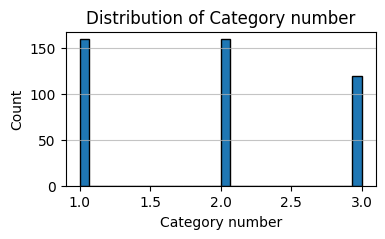

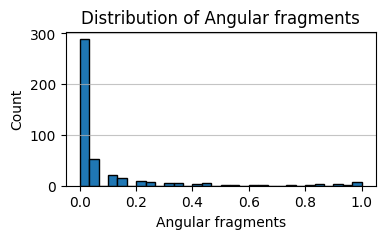

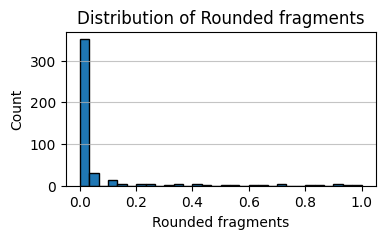

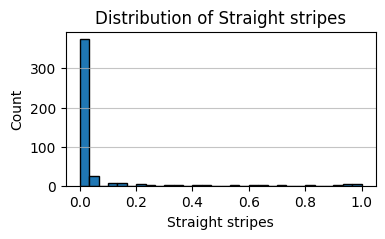

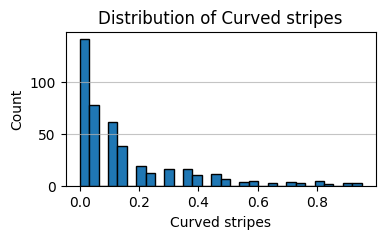

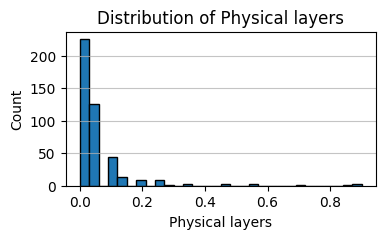

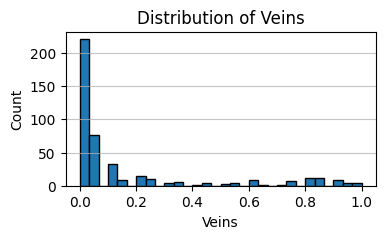

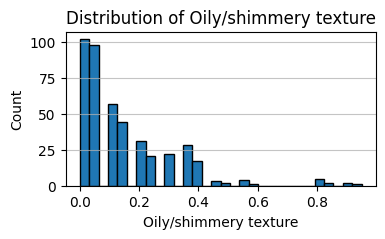

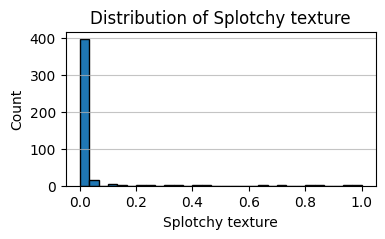

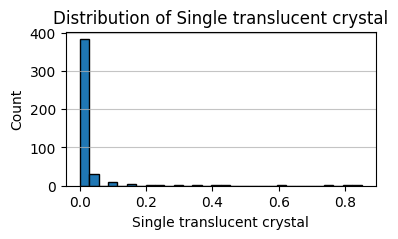

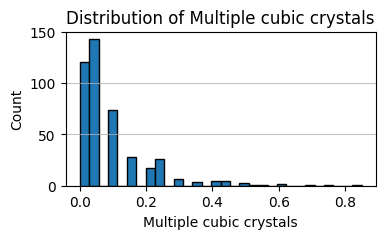

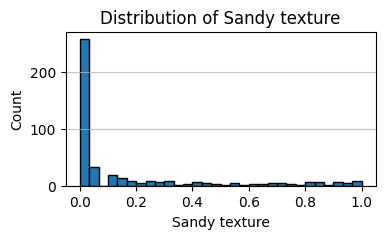

In [119]:
##Next I want to display histograms of the data to analyze whether they are linearly correlated to 
##our goal prediction  and check for outliers and abnomalities from the bell curve we all know and love
import matplotlib.pyplot as plt

columns = df_data.select_dtypes(include=['float64', 'int64']).columns

##Just plot the historgram of each feature column. I will analyze each in the markdown below in teh analysis section
for column in columns:
    plt.figure(figsize=(4, 2))
    plt.hist(df_data[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    plt.show() 

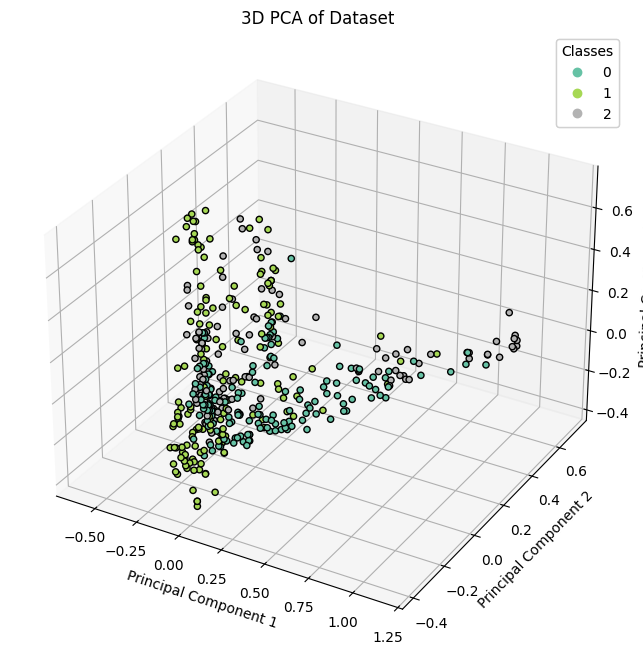

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA
pca = PCA(n_components=3)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(df_features)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['class'] = df_labels  # Add the class labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                     c=df_pca['class'].astype('category').cat.codes,  # Use class labels for coloring
                     cmap='Set2', alpha=1, edgecolors='k')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Set labels and title
ax.set_title('3D PCA of Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

#This is jsut for me, if I want to put it inh later, I need to code it myself

<h3>PT. 1: ANALYSIS</h3>

<p>Yea, so the data is very sparse R.I.P.</p>

<h2>PT. 2: DATA RELATIONSHIPS WITH PCC</h2>


In [120]:
##There is also a handy dandy pd function for findinfg the pearson correlation for each label
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 2000)    

# Compute the pearson correlation for each label
df_pcc_matrix = df_data.corr(method='pearson')

pcc_category_number = df_pcc_matrix['Category number']
print("\n---------------------------------Pearson Correlation Coefficient Matrix---------------------------------\n")
print(df_pcc_matrix)

print("\n---------------------------------Category Number PCC---------------------------------\n")
print(pcc_category_number)


---------------------------------Pearson Correlation Coefficient Matrix---------------------------------

                            Category number  Angular fragments  Rounded fragments  Straight stripes  Curved stripes  Physical layers     Veins  Oily/shimmery texture  Splotchy texture  Single translucent crystal  Multiple cubic crystals  Sandy texture
Category number                    1.000000           0.067955           0.015793          0.006230        0.246660         0.160071  0.060726              -0.196602          0.277152                    0.083285                -0.039720       0.002162
Angular fragments                  0.067955           1.000000          -0.119750         -0.092089       -0.237862        -0.146235 -0.159531              -0.012921         -0.093330                   -0.031420                -0.120160       0.797659
Rounded fragments                  0.015793          -0.119750           1.000000          0.231210       -0.008057         0.075279 -0.0

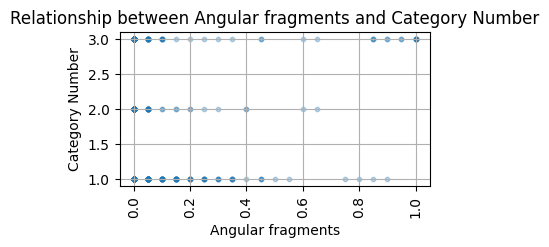

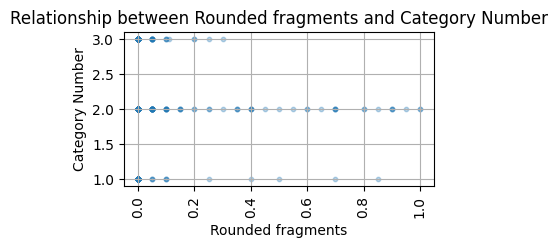

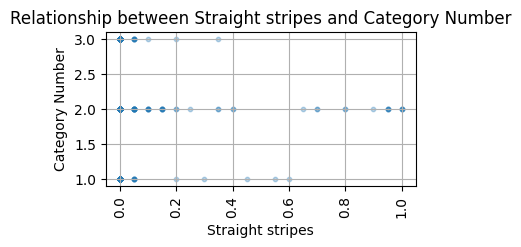

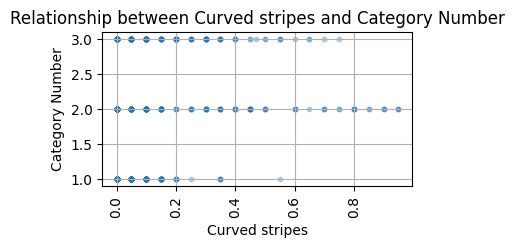

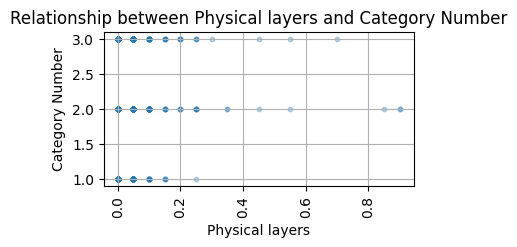

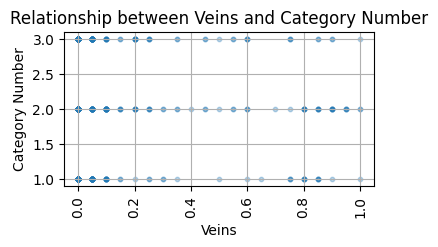

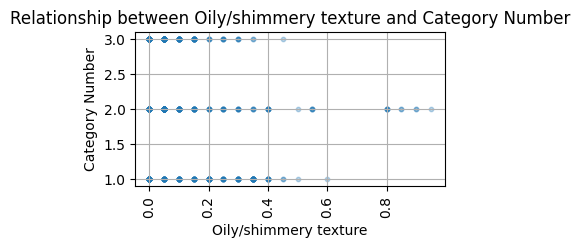

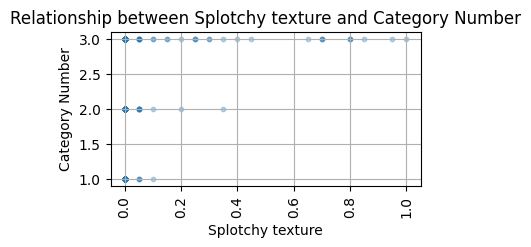

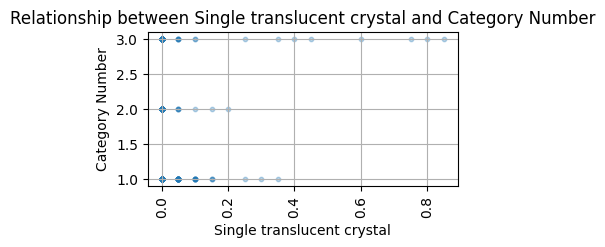

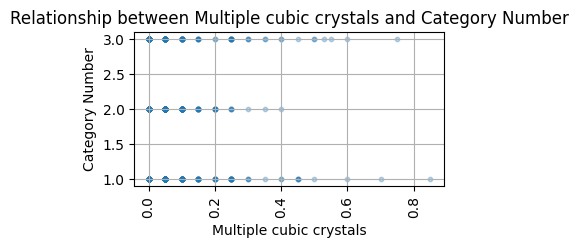

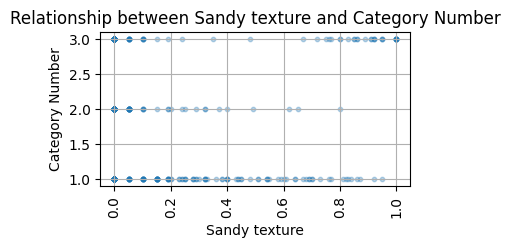

In [121]:
#Now I want to plot the relationship between each feature and the Category Number

#create the scatterplot for each feature and its relationship to the Category Number
for column in df_data.columns:
    if column == 'Category number':  continue
    plt.figure(figsize=(4, 2))
    plt.scatter(df_data[column], df_data['Category number'], alpha=0.3, s=10)
    plt.title(f'Relationship between {column} and Category Number')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Category Number')
    plt.grid()
    plt.show()

Eh, Ive seen better, Ive seen worse

<h2> Data Preprocessing and Splitting </h2>
<p>Preprocess the data and split it into training and testing sets for our models </p> 